# Classification Project  :
# ( Predict Heart Attack )
* KNN Algorithm
* Decision Tree
* Logistic Regression
* SVM
* Histogram-Based Gradient Boosting
* Gradient Tree Boosting
* AdaBoost

### Import library :

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Read data :

In [89]:
df = pd.read_csv('G:/Heart(1) (1).csv')
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Describing Data :
* Age
* sex - 1 = men , 2 = women
* cp - type of chest plain : 0 = (Heart plain) , 1 = (Indirect Heart plain) , 2 = (Not Heart plain) , 3 = (Not plain)
* trtbps - Resting blood pressure
* chol - cholestrol
* fbs - diabet : 1 = has , 0 = doesn't have
* restecg - ECG Heart : 0 = Normal , 1 = None Normal , 2 = big Heart
* thalachh - Number of Beat
* exng - start pain with exercise : 0 = No , 1 = Yes
* Output - Possibility Heart attack : 0 = Low , 1 = High

### Create New df :

In [90]:
df = df[['age','sex' , 'cp' , 'trtbps' , 'chol' , 'fbs' , 'restecg' , 'thalachh' , 'exng' , 'output']]
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,1.000000


### Clean Data :
* Delete NaN value
* change column type to float

### Delete NaN val :

In [91]:
# shape size :
print('shape size without drop : ' , df.shape)

# drop NaN val :
df = df.dropna()
df = df.reset_index(drop = True)
print('shape size after drop Nan val : ' ,df.shape )

shape size without drop :  (303, 10)
shape size after drop Nan val :  (303, 10)


### change type of column :

In [92]:
mylist = ['age','sex' , 'cp' , 'trtbps' , 'chol' , 'fbs' , 'restecg' , 'thalachh' , 'exng' , 'output']

for col in range(0 , len(mylist)) :
    df[mylist[col]] = df[mylist[col]].astype(float)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,output
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,1.0


### Sort data :

In [93]:
df = df.sort_values(by=['age','sex' , 'cp' , 'trtbps' , 'chol' , 'fbs' , 'restecg' , 'thalachh' , 'exng' , 'output']).reset_index(drop = True)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,output
0,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,1.0
1,34.0,0.0,1.0,118.0,210.0,0.0,1.0,192.0,0.0,1.0
2,34.0,1.0,3.0,118.0,182.0,0.0,0.0,174.0,0.0,1.0
3,35.0,0.0,0.0,138.0,183.0,0.0,1.0,182.0,0.0,1.0
4,35.0,1.0,0.0,120.0,198.0,0.0,1.0,130.0,1.0,0.0


### Show Data :

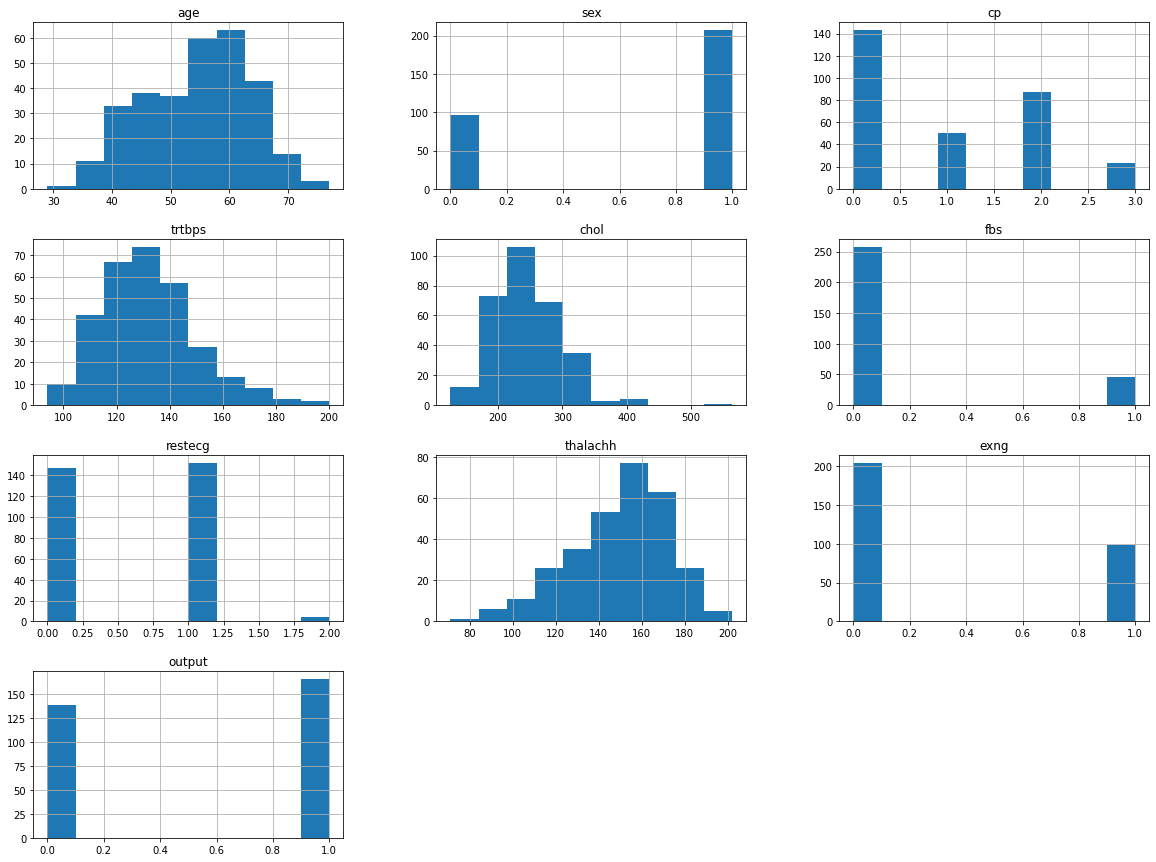

In [94]:
df.hist(figsize=(20 , 15))
plt.show()

# Show two dimensional data Correlation :

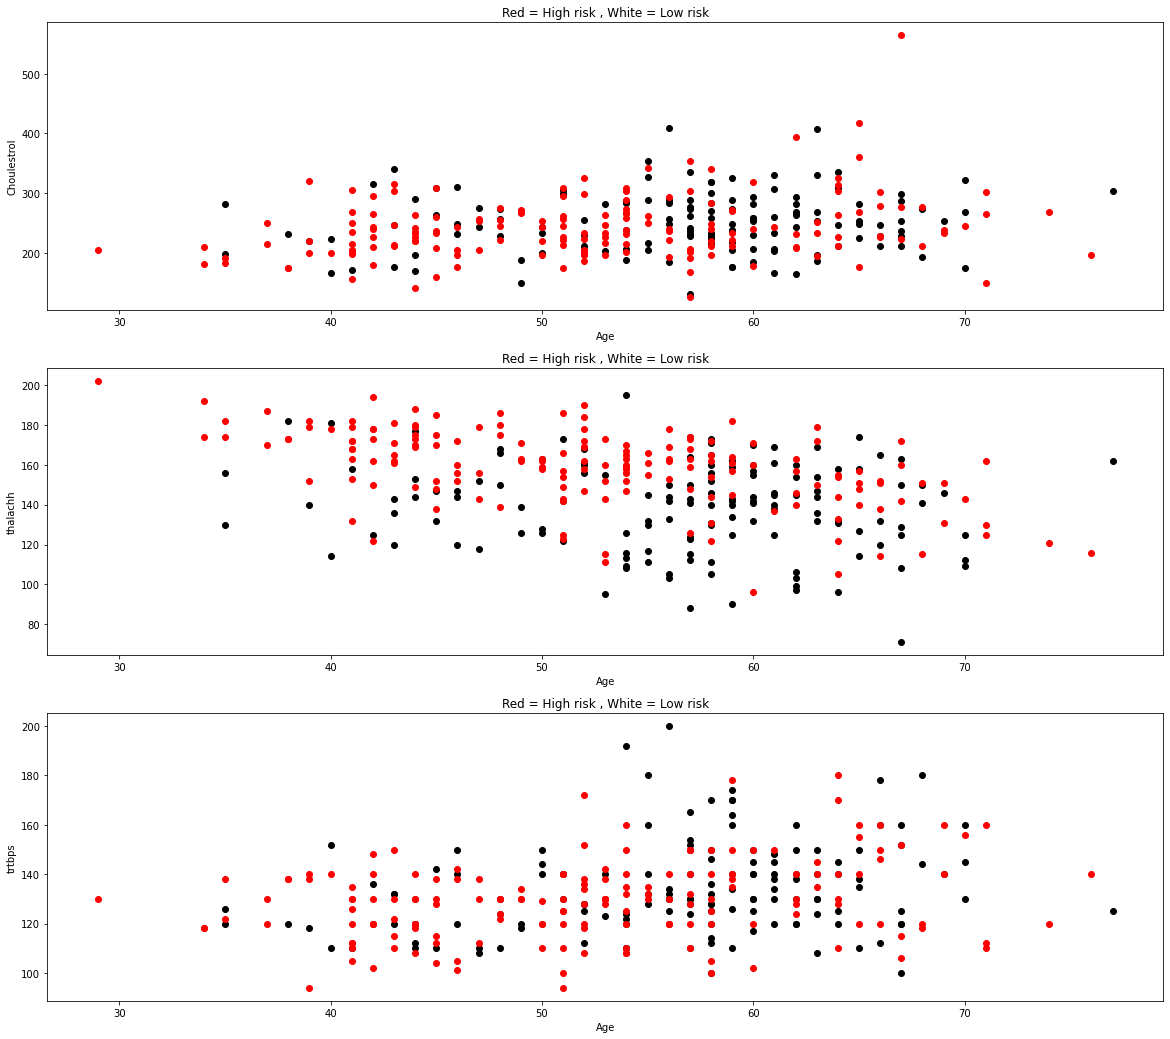

In [95]:
fig, axs = plt.subplots(3 , figsize=(20,18))

axs[0].scatter(df[df['output'] == 0]['age'] , df[df['output'] == 0]['chol'],  color='black')
axs[0].scatter(df[df['output'] == 1]['age'] , df[df['output'] == 1]['chol'],  color='red')
axs[0].set_ylabel("Choulestrol")
axs[0].set_xlabel("Age")
axs[0].set_title('Red = High risk , White = Low risk')

axs[1].scatter(df[df['output'] == 0]['age'] , df[df['output'] == 0]['thalachh'],  color='black')
axs[1].scatter(df[df['output'] == 1]['age'] , df[df['output'] == 1]['thalachh'],  color='red')
axs[1].set_ylabel("thalachh")
axs[1].set_xlabel("Age")
axs[1].set_title('Red = High risk , White = Low risk')

axs[2].scatter(df[df['output'] == 0]['age'] , df[df['output'] == 0]['trtbps'],  color='black')
axs[2].scatter(df[df['output'] == 1]['age'] , df[df['output'] == 1]['trtbps'],  color='red')
axs[2].set_ylabel("trtbps")
axs[2].set_xlabel("Age")
axs[2].set_title('Red = High risk , White = Low risk')

plt.show()

### DataFrame to matrix to use skit-learn library :

In [96]:
X = df[['age','sex' , 'cp' , 'trtbps' , 'chol' , 'fbs' , 'restecg' , 'thalachh' , 'exng' ,]].values
X[0:5]

array([[ 29.,   1.,   1., 130., 204.,   0.,   0., 202.,   0.],
       [ 34.,   0.,   1., 118., 210.,   0.,   1., 192.,   0.],
       [ 34.,   1.,   3., 118., 182.,   0.,   0., 174.,   0.],
       [ 35.,   0.,   0., 138., 183.,   0.,   1., 182.,   0.],
       [ 35.,   1.,   0., 120., 198.,   0.,   1., 130.,   1.]])

In [97]:
Y = df['output'].values
Y[:5]

array([1., 1., 1., 1., 0.])

### Normalize data :

In [98]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))

X[:5]

array([[-2.8 ,  0.68,  0.03, -0.09, -0.82, -0.42, -1.01,  2.29, -0.7 ],
       [-2.25, -1.47,  0.03, -0.78, -0.7 , -0.42,  0.9 ,  1.85, -0.7 ],
       [-2.25,  0.68,  1.97, -0.78, -1.24, -0.42, -1.01,  1.06, -0.7 ],
       [-2.14, -1.47, -0.94,  0.36, -1.22, -0.42,  0.9 ,  1.41, -0.7 ],
       [-2.14,  0.68, -0.94, -0.66, -0.93, -0.42,  0.9 , -0.86,  1.44]])

### Split data to test and main :

In [99]:
from sklearn.model_selection import train_test_split

X_main, X_test, Y_main, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

print ('Train set:', X_main.shape,  Y_main.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (242, 9) (242,)
Test set: (61, 9) (61,)


# K-Nearest Neighbors (KNN) Multi dimensional :

In [100]:
from sklearn.neighbors import KNeighborsClassifier

# start k for test : k = 3
k = 3
neighber = KNeighborsClassifier(n_neighbors= k).fit(X_main , Y_main)

### Predict AND Evaluation :

In [101]:
from sklearn import metrics

Y_test_hat = neighber.predict(X_test)
Y_main_hat = neighber.predict(X_main)

print("Main set Accuracy : ", metrics.accuracy_score(Y_main, Y_main_hat))
print("Test set Accuracy : ", metrics.accuracy_score(Y_test, Y_test_hat))

# predict 1 person :
information = [[45 , 1 , 1 , 120 , 208 , 0 , 0, 130 , 1]]
information_normalize = scaler.transform(information)

prd = neighber.predict(information_normalize)

print('predict person with bellow information : \n'
      'age = 45 , sex = 1 , cp = 1 , trtbps = 120 , chol = 208 , fbs = 0 , restecq = 0 , thalachh = 130 , exng = 1 : \n'
      '{}'.format(prd[0]))

Main set Accuracy :  0.8553719008264463
Test set Accuracy :  0.7704918032786885
predict person with bellow information : 
age = 45 , sex = 1 , cp = 1 , trtbps = 120 , chol = 208 , fbs = 0 , restecq = 0 , thalachh = 130 , exng = 1 : 
0.0


### choose best k for KNN alguritm :

In [102]:
K = {}
for num in range(2 , 11) :

    k = num
    neighber = KNeighborsClassifier(n_neighbors= k).fit(X_main , Y_main)
    Y_test_hat = neighber.predict(X_test)

    K[str(num)] = metrics.accuracy_score(Y_test, Y_test_hat)

accuracy = K[str(2 + list(K.values()).index(max(list(K.values()))))]
index_ = str(2 + list(K.values()).index(max(list(K.values()))))
print('Best K for KNN in this example = {} , it accuracies = {}'.format(index_ , accuracy))

Best K for KNN in this example = 4 , it accuracies = 0.8032786885245902


In [103]:
# Import library :
from sklearn.tree import DecisionTreeClassifier

### Read and prepare data :

In [104]:
df = pd.read_csv('G:/Heart(1) (1).csv')

columns = list(df.columns)

# change type columns :
for col in range(0 , len(columns)) :
    df[columns[col]] = df[columns[col]].astype(float)

columns.remove('output')

X = df[columns].values
Y = df['output'].values

# Test and Train data :
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=.2 , random_state=4)

# Tree :

In [105]:
Tree = DecisionTreeClassifier(criterion='entropy' , max_depth=4)
Tree.fit(X_train , Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Predict :

In [106]:
Y_test_hat = Tree.predict(X_test)

# Evaluation :

In [107]:
from sklearn.metrics import accuracy_score
print('Accuracy score predict decision tree algorithm : ' , accuracy_score(Y_test , Y_test_hat))

Accuracy score predict decision tree algorithm :  0.8524590163934426


# Plot Tree :

In [108]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data = StringIO()
filename = "Tree.png"
featureNames = columns

Y_train = Y_train.astype(str)
out = tree.export_graphviz(Tree, feature_names=featureNames, out_file=dot_data, class_names=np.unique(Y_train),
                           filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')
plt.show()

ModuleNotFoundError: No module named 'pydotplus'

# Confusion matrix :

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes , normalize=False , title='Confusion matrix' ,cmap=plt.cm.Blues ):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(Y_test, Y_test_hat, labels=[0, 1])
np.set_printoptions(precision=2)

plt.figure(figsize=(15 , 15))
plot_confusion_matrix(cnf_matrix, classes=['0', '1'], normalize=False, title='Confusion matrix')
plt.savefig('E:\Machine Learning\Predict_House_Price/Confusion matrix.png' , dpi = 400)
plt.show()

# Logistic regression :

In [ ]:
# Read data :
df = pd.read_csv('G:/Heart(1) (1).csv')

columns = list(df.columns)

# change type columns :
for col in range(0 , len(columns)) :
    df[columns[col]] = df[columns[col]].astype(float)

columns.remove('output')

X = df[columns].values
Y = df['output'].values

# Normalize data :
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , random_state=3 , test_size=.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
c = [0 , 1] # in range 
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

# predict and evaluation :

In [ ]:
from sklearn.metrics import accuracy_score

Y_test_hat = LR.predict(X_test)
Y_test_hat , Y_test = Y_test_hat.astype(str) , Y_test.astype(str)

print('Accuracy score logistic regression : ', accuracy_score(Y_test , Y_test_hat))

# Support Vector Machine ( SVM ) :

In [ ]:
df = pd.read_csv('G:/Heart(1) (1).csv')

columns = list(df.columns)
for col in range(0 , len(columns)) :
    df[columns[col]] = df[columns[col]].astype(float)

columns.remove('output')

X = df[columns].values
Y = df['output'].values

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=.8 , random_state= 4)

In [ ]:
from sklearn import svm
kernel = ['Linear','Polynomial','Radial basis function (RBF)','Sigmoid',]
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)

# predict and evaluation :

In [ ]:
Y_test_hat = clf.predict(X_test)

print('Accuracy score SVM : ', accuracy_score(Y_test , Y_test_hat))

# ENSEMBLE LEARNING METHODS FOR DECISION MAKING



# Bagging meta-estimator

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                             max_samples=0.5, max_features=0.5)

In [110]:
df = pd.read_csv('G:/Heart(1) (1).csv')

columns = list(df.columns)
for col in range(0 , len(columns)) :
    df[columns[col]] = df[columns[col]].astype(float)

columns.remove('output')

X = df[columns].values
Y = df['output'].values

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state= 4)

In [111]:
bagging.fit(X_train, Y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)

In [112]:
Y_test_hat =bagging .predict(X_test)

print('Accuracy score Bagging meta-estimator : ', accuracy_score(Y_test , Y_test_hat))

Accuracy score Bagging meta-estimator :  0.7213114754098361


# Forests of randomized trees

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('G:/Heart(1) (1).csv')

columns = list(df.columns)
for col in range(0 , len(columns)) :
    df[columns[col]] = df[columns[col]].astype(float)

columns.remove('output')

X = df[columns].values
Y = df['output'].values

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state= 4)


clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
     random_state=0)
scores = cross_val_score(clf, X, Y, cv=5)
scores.mean()


clf = RandomForestClassifier(n_estimators=10, max_depth=None,
     min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, Y, cv=5)
scores.mean()


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
     min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, Y, cv=5)
scores.mean() 
print('Accuracy score Forests of randomized trees : ', accuracy_score(Y_test , Y_test_hat))


Accuracy score Forests of randomized trees :  0.7213114754098361


# AdaBoost

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
df = pd.read_csv('G:/Heart(1) (1).csv')

columns = list(df.columns)
for col in range(0 , len(columns)) :
    df[columns[col]] = df[columns[col]].astype(float)

columns.remove('output')

X = df[columns].values
Y = df['output'].values

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.15, random_state= 4)
clf = AdaBoostClassifier(n_estimators=100)

In [140]:
clf.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=100)

In [141]:
Y_test_hat =clf .predict(X_test)

print('Accuracy score AdaBoost : ', accuracy_score(Y_test , Y_test_hat))

Accuracy score AdaBoost :  0.8260869565217391


# Gradient Tree Boosting

In [121]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
columns = list(df.columns)
for col in range(0 , len(columns)) :
    df[columns[col]] = df[columns[col]].astype(float)

columns.remove('output')

X = df[columns].values
Y = df['output'].values

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.1 , random_state= 4)


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8709677419354839

# Histogram-Based Gradient Boosting

In [126]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
columns = list(df.columns)
for col in range(0 , len(columns)) :
    df[columns[col]] = df[columns[col]].astype(float)

columns.remove('output')

X = df[columns].values
Y = df['output'].values

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.1 , random_state= 4)

clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, Y_train)
clf.score(X_test, Y_test)


0.8709677419354839